In [1]:
library(tidyverse) # metapackage with lots of helpful functions
library(ggthemes)
library(plotly)
library(rmarkdown)
list.files(path = "../input/m5-forecasting-accuracy")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.4     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




[1] "calendar.csv"               "sales_train_validation.csv"
[3] "sample_submission.csv"      "sell_prices.csv"

In [2]:
dat <- read_csv("../input/m5-forecasting-accuracy/sales_train_validation.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  id = col_character(),
  item_id = col_character(),
  dept_id = col_character(),
  cat_id = col_character(),
  store_id = col_character(),
  state_id = col_character()
)

See spec(...) for full column specifications.



In [3]:
dat_ca <- dat %>% 
  filter(store_id == "CA_1") %>%
  pivot_longer(cols = d_1:d_1913,names_to = "day", values_to = "sales") %>%
  mutate(day = as.numeric(substr(day,3,6)))

In [4]:
dat_ca

id,item_id,dept_id,cat_id,store_id,state_id,day,sales
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,3,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,4,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,5,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,6,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,7,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,8,0
HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,9,0


In [5]:
html_notebook_output_code("<style>.scroll_box { height:30em  !important; }</style>")

[1] "\n<!-- rnb-source-begin eyJkYXRhIjoiYGBgclxuPHN0eWxlPi5zY3JvbGxfYm94IHsgaGVpZ2h0OjMwZW0gICFpbXBvcnRhbnQ7IH08XC9zdHlsZT5cbmBgYCJ9 -->\n\n```r\n<style>.scroll_box { height:30em  !important; }</style>\n```\n\n<!-- rnb-source-end -->\n"
attr(,"class")
[1] "knit_asis"
attr(,"knit_cacheable")
[1] NA

In [6]:
unique(dat_ca$item_id)

[1] "HOBBIES_1_001"   "HOBBIES_1_002"   "HOBBIES_1_003"   "HOBBIES_1_004"  
   [5] "HOBBIES_1_005"   "HOBBIES_1_006"   "HOBBIES_1_007"   "HOBBIES_1_008"  
   [9] "HOBBIES_1_009"   "HOBBIES_1_010"   "HOBBIES_1_011"   "HOBBIES_1_012"  
  [13] "HOBBIES_1_013"   "HOBBIES_1_014"   "HOBBIES_1_015"   "HOBBIES_1_016"  
  [17] "HOBBIES_1_017"   "HOBBIES_1_018"   "HOBBIES_1_019"   "HOBBIES_1_020"  
  [21] "HOBBIES_1_021"   "HOBBIES_1_022"   "HOBBIES_1_023"   "HOBBIES_1_024"  
  [25] "HOBBIES_1_025"   "HOBBIES_1_026"   "HOBBIES_1_027"   "HOBBIES_1_028"  
  [29] "HOBBIES_1_029"   "HOBBIES_1_030"   "HOBBIES_1_031"   "HOBBIES_1_032"  
  [33] "HOBBIES_1_033"   "HOBBIES_1_034"   "HOBBIES_1_035"   "HOBBIES_1_036"  
  [37] "HOBBIES_1_037"   "HOBBIES_1_038"   "HOBBIES_1_039"   "HOBBIES_1_040"  
  [41] "HOBBIES_1_041"   "HOBBIES_1_042"   "HOBBIES_1_043"   "HOBBIES_1_044"  
  [45] "HOBBIES_1_045"   "HOBBIES_1_046"   "HOBBIES_1_047"   "HOBBIES_1_048"  
  [49] "HOBBIES_1_049"   "HOBBIES_1_050"   "HOBBIES_1_051"   "HOBBIES_1_052"  
  [53] "HOBBIES_1_053"   "HOBBIES_1_054"   "HOBBIES_1_055"   "HOBBIES_1_056"  
  [57] "HOBBIES_1_057"   "HOBBIES_1_058"   "HOBBIES_1_060"   "HOBBIES_1_061"  
  [61] "HOBBIES_1_062"   "HOBBIES_1_063"   "HOBBIES_1_064"   "HOBBIES_1_065"  
  [65] "HOBBIES_1_066"   "HOBBIES_1_067"   "HOBBIES_1_068"   "HOBBIES_1_069"  
  [69] "HOBBIES_1_070"   "HOBBIES_1_072"   "HOBBIES_1_073"   "HOBBIES_1_074"  
  [73] "HOBBIES_1_075"   "HOBBIES_1_076"   "HOBBIES_1_077"   "HOBBIES_1_078"  
  [77] "HOBBIES_1_079"   "HOBBIES_1_080"   "HOBBIES_1_081"   "HOBBIES_1_082"  
  [81] "HOBBIES_1_083"   "HOBBIES_1_084"   "HOBBIES_1_085"   "HOBBIES_1_086"  
  [85] "HOBBIES_1_087"   "HOBBIES_1_088"   "HOBBIES_1_089"   "HOBBIES_1_090"  
  [89] "HOBBIES_1_091"   "HOBBIES_1_092"   "HOBBIES_1_093"   "HOBBIES_1_094"  
  [93] "HOBBIES_1_095"   "HOBBIES_1_097"   "HOBBIES_1_098"   "HOBBIES_1_099"  
  [97] "HOBBIES_1_100"   "HOBBIES_1_102"   "HOBBIES_1_103"   "HOBBIES_1_104"  
 [101] "HOBBIES_1_105"   "HOBBIES_1_106"   "HOBBIES_1_107"   "HOBBIES_1_108"  
 [105] "HOBBIES_1_109"   "HOBBIES_1_110"   "HOBBIES_1_111"   "HOBBIES_1_112"  
 [109] "HOBBIES_1_113"   "HOBBIES_1_114"   "HOBBIES_1_115"   "HOBBIES_1_116"  
 [113] "HOBBIES_1_117"   "HOBBIES_1_118"   "HOBBIES_1_119"   "HOBBIES_1_120"  
 [117] "HOBBIES_1_121"   "HOBBIES_1_122"   "HOBBIES_1_123"   "HOBBIES_1_124"  
 [121] "HOBBIES_1_125"   "HOBBIES_1_126"   "HOBBIES_1_127"   "HOBBIES_1_128"  
 [125] "HOBBIES_1_129"   "HOBBIES_1_130"   "HOBBIES_1_131"   "HOBBIES_1_132"  
 [129] "HOBBIES_1_133"   "HOBBIES_1_134"   "HOBBIES_1_135"   "HOBBIES_1_136"  
 [133] "HOBBIES_1_137"   "HOBBIES_1_138"   "HOBBIES_1_139"   "HOBBIES_1_140"  
 [137] "HOBBIES_1_141"   "HOBBIES_1_142"   "HOBBIES_1_143"   "HOBBIES_1_144"  
 [141] "HOBBIES_1_145"   "HOBBIES_1_146"   "HOBBIES_1_147"   "HOBBIES_1_148"  
 [145] "HOBBIES_1_149"   "HOBBIES_1_150"   "HOBBIES_1_151"   "HOBBIES_1_152"  
 [149] "HOBBIES_1_153"   "HOBBIES_1_154"   "HOBBIES_1_155"   "HOBBIES_1_156"  
 [153] "HOBBIES_1_157"   "HOBBIES_1_158"   "HOBBIES_1_159"   "HOBBIES_1_160"  
 [157] "HOBBIES_1_161"   "HOBBIES_1_162"   "HOBBIES_1_163"   "HOBBIES_1_164"  
 [161] "HOBBIES_1_165"   "HOBBIES_1_166"   "HOBBIES_1_167"   "HOBBIES_1_168"  
 [165] "HOBBIES_1_169"   "HOBBIES_1_170"   "HOBBIES_1_171"   "HOBBIES_1_172"  
 [169] "HOBBIES_1_173"   "HOBBIES_1_174"   "HOBBIES_1_175"   "HOBBIES_1_176"  
 [173] "HOBBIES_1_177"   "HOBBIES_1_178"   "HOBBIES_1_179"   "HOBBIES_1_180"  
 [177] "HOBBIES_1_181"   "HOBBIES_1_183"   "HOBBIES_1_184"   "HOBBIES_1_185"  
 [181] "HOBBIES_1_186"   "HOBBIES_1_187"   "HOBBIES_1_188"   "HOBBIES_1_189"  
 [185] "HOBBIES_1_190"   "HOBBIES_1_191"   "HOBBIES_1_192"   "HOBBIES_1_193"  
 [189] "HOBBIES_1_194"   "HOBBIES_1_195"   "HOBBIES_1_197"   "HOBBIES_1_198"  
 [193] "HOBBIES_1_199"   "HOBBIES_1_200"   "HOBBIES_1_201"   "HOBBIES_1_202"  
 [197] "HOBBIES_1_203"   "HOBBIES_1_204"   "HOBBIES_1_205"   "HOBBIES_1_206"  
 [201] "HOBBIES_1_207"   "HOBBIES_1_208"   "HOBBIES_1

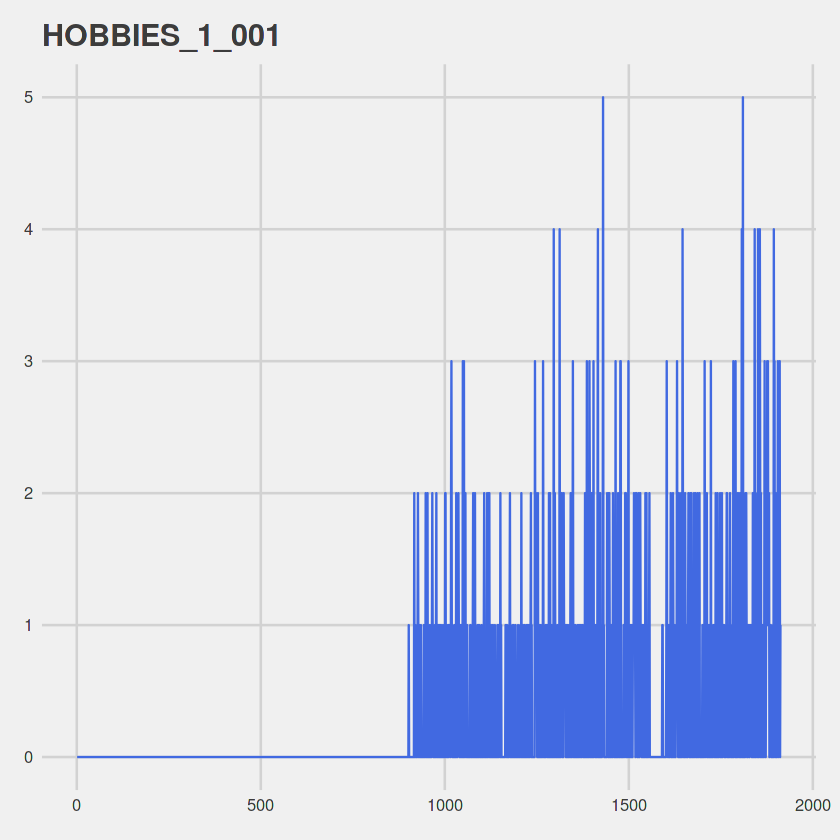

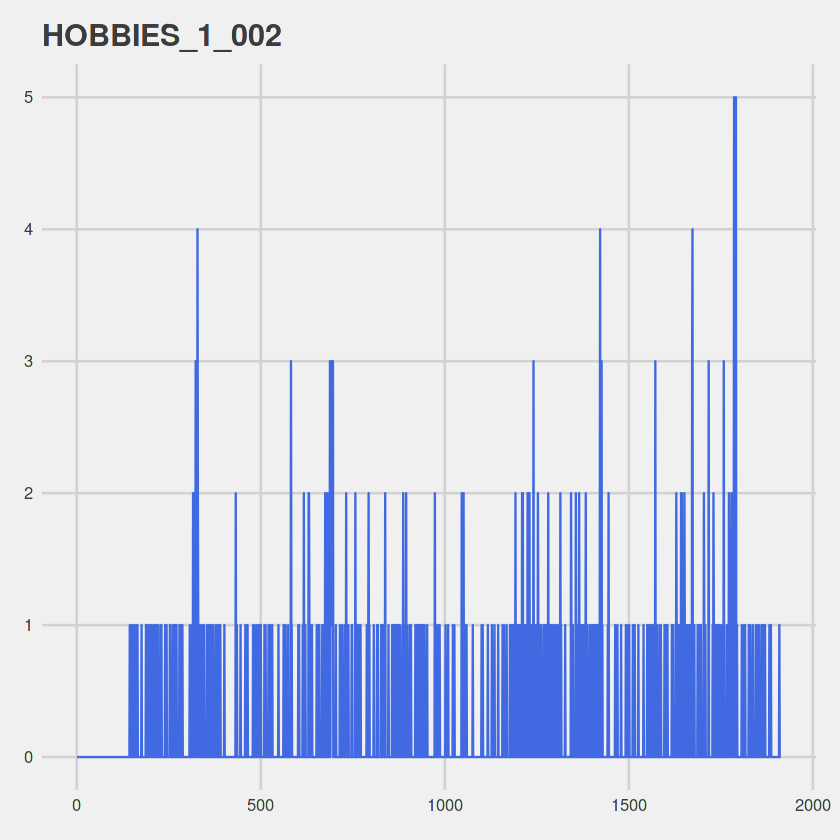

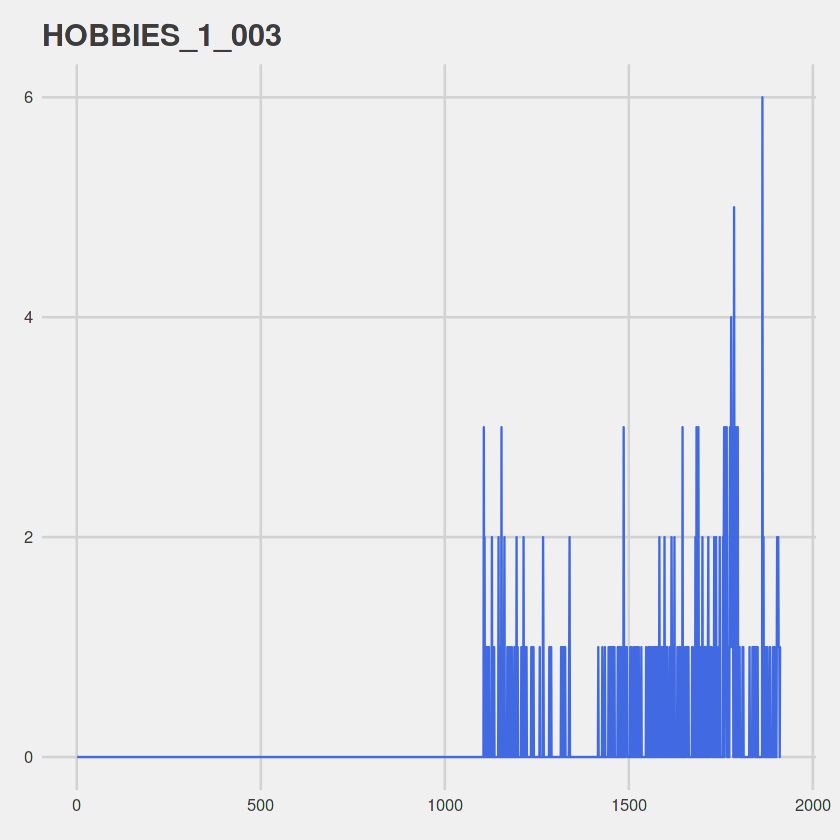

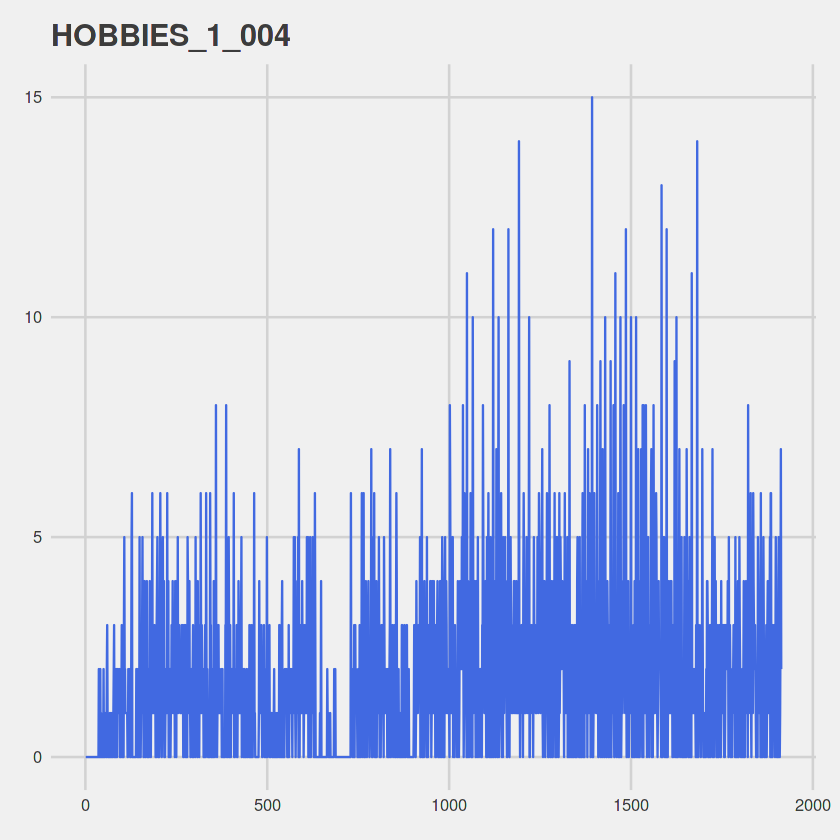

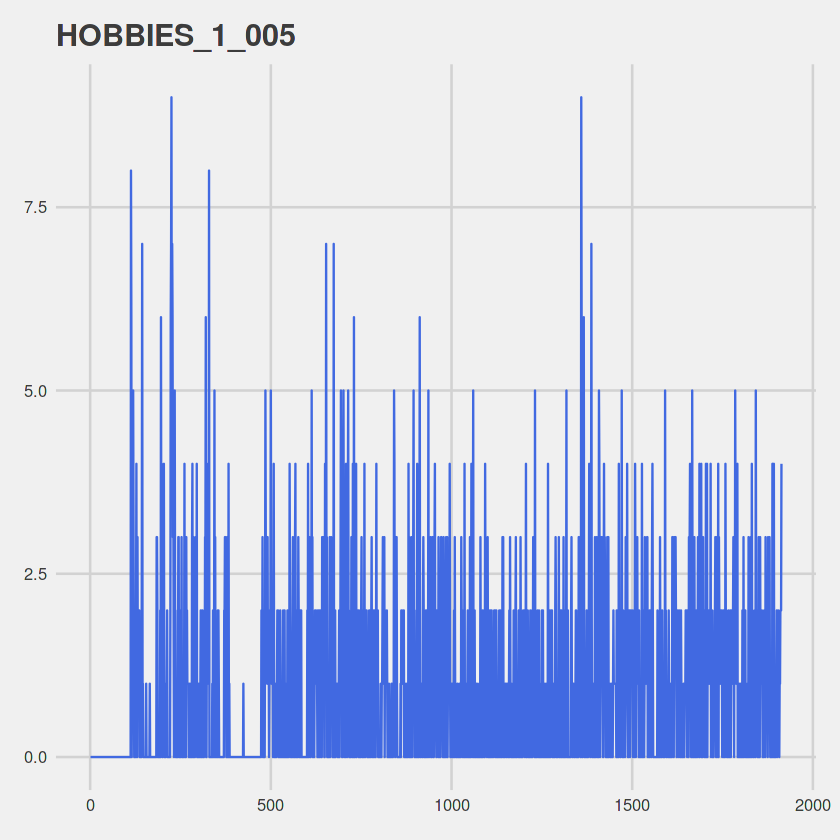

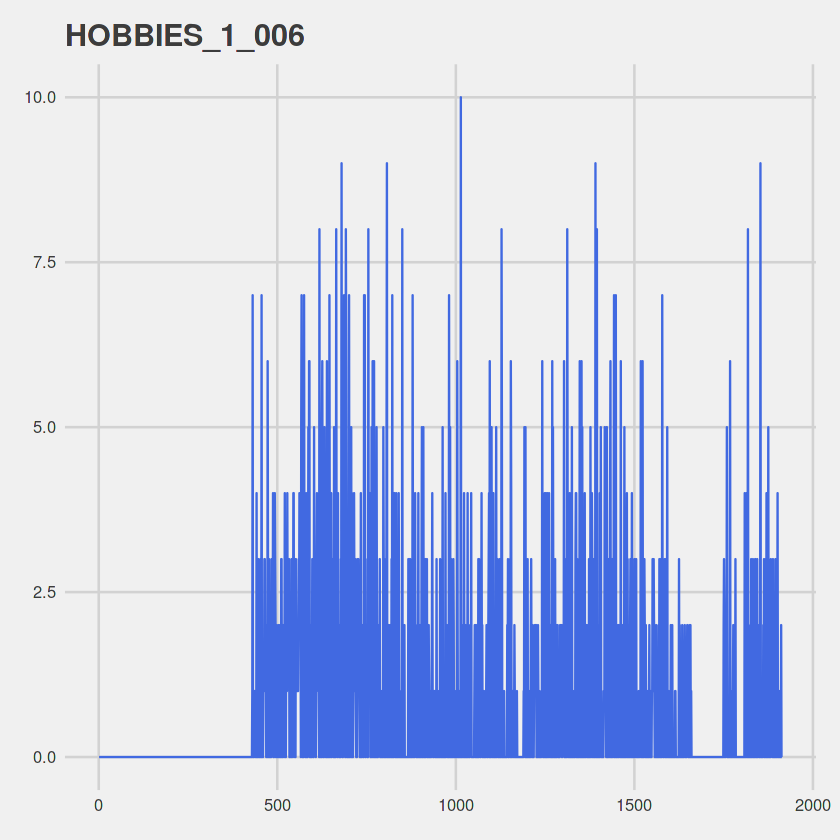

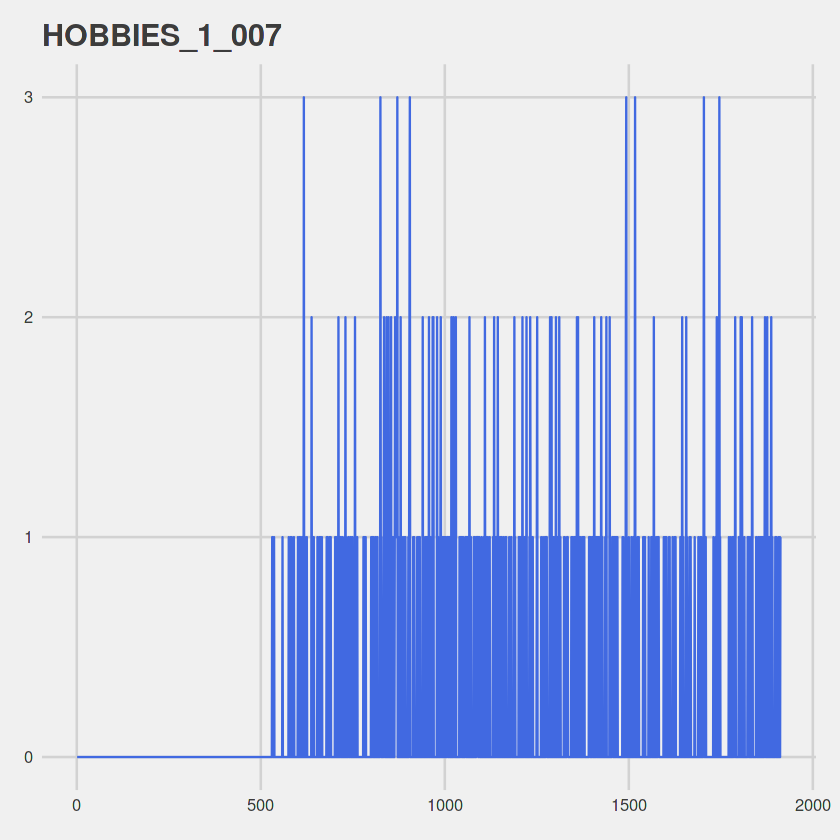

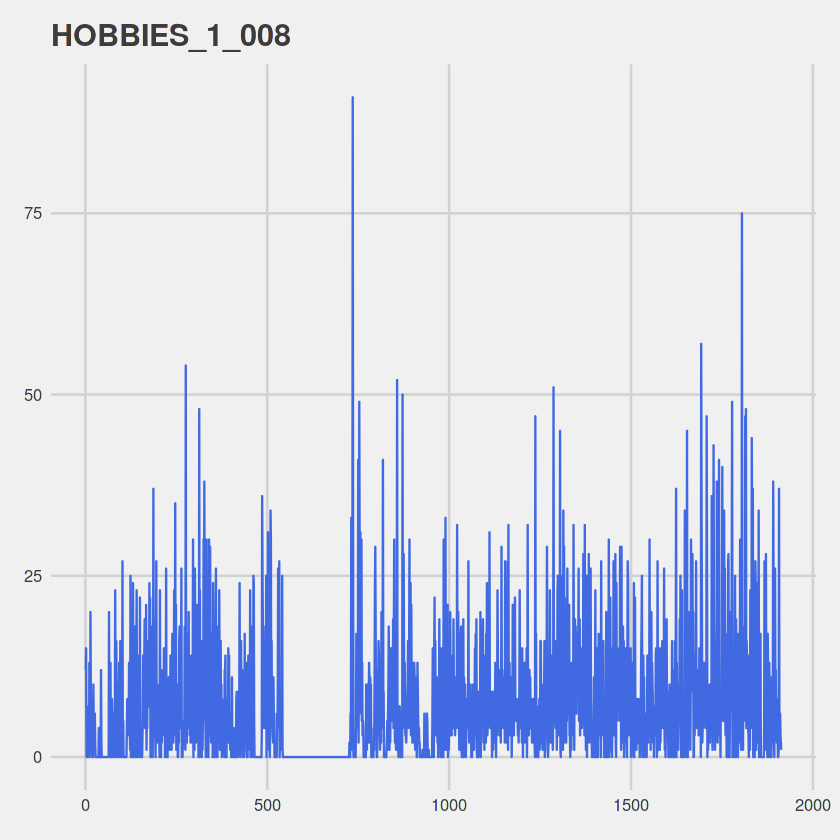

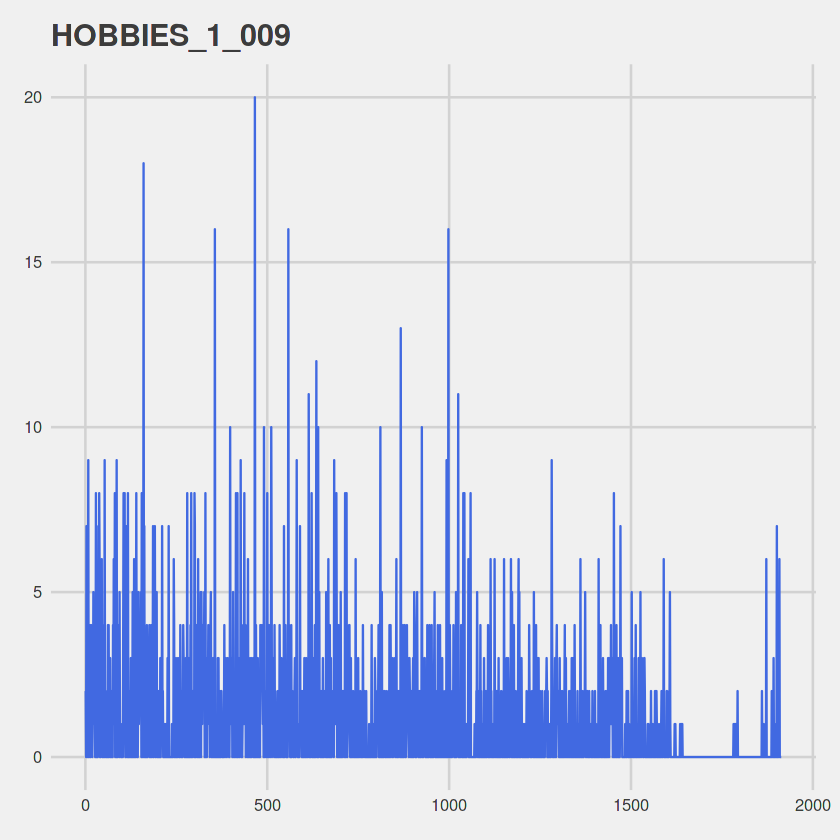

In [7]:
i = 1
for(item in unique(dat_ca$item_id)){
  p <- dat_ca %>% 
    filter(item_id == item) %>%
    ggplot(aes(day,sales)) + 
    geom_line(colour = "#4169e1") + 
    theme_fivethirtyeight() +
#     coord_flip() +
    scale_fill_viridis_c(option = "viridis") +
    labs(title = item)
plot(p)
i = i + 1
if(i==10)break
}